
##### >> If you have never used a Jupyter notebook before, check out the documentation before running the code: https://jupyter-notebook-beginner-guide.readthedocs.io/ <<

# Zero-sum subset

We are given a set of integer numbers, for example $\left\{2,5,4,-3,-11\right\}$. Right now, we have chosen a very small set of only $5$ numbers, but in principal our set could be very large. 

The goal is now to find a subset of these numbers that add up to zero. In our case, one can check that the solution is the subset $\left\{2,5,4,-11\right\}$, since $2+5+4-11=0$. Another possible solution is always $\{\}$, the empty set. But this is not very interesting and we will call it the trivial solution.


To make everything more general, we can replace these numbers by $N$ variables $C=\left\{ c_1, c_2, c_3, \dots, c_N\right\}$, where the dots ($\dots$) imply that you have to fill in the remaining numbers.

To specify a subset, we will introduce another set of variables $X=\left\{ x_1, x_2, x_3, \dots, x_N\right\}$. We will require that any of these variables $x_i$ are either $0$ or $1$. Sometimes these are called binary variables. If $x_i=1$, it means that $c_i$ is included in the subset. If $x_i=0$, the number $c_i$ is not included.

In this notation, we can compute the sum $S$ of all numbers in a subset as

$S=x_1 \cdot c_1 + x_2 \cdot c_2 + x_3 \cdot c_3 + \dots + x_N \cdot c_N$.

You can see that the notation using the dots ($\dots$) becomes a little cumbersome. For this reason, people have come up with the following notation:

$S =  \sum_{i=1}^{N} x_i \cdot c_i$

The $\sum$ symbol (greek S) is an abbreviation for the following instructions: Replace all $i$ to the right of it by $1$ (you get $x_1 \cdot c_1$), then $2$ (you get $x_2 \cdot c_2$), then $3$, and all the way up to $N$ and then sum all of these terms. Voilà, you can see that you get the original sum $S$.

***
### Exercise

1. *For the set $\left\{2,5,4,-3,-11\right\}$, what is the set $X=\{x_1, x_2, x_3, x_4, x_5\}$ that specifies the zero-sum subset?*


2. *What is the subset corresponding to $X=\{1,0,1,1,0\}$ and what is its sum?*


3. *How about $X=\{0,0,0,0,0\}$?*

***



### Let's code

Below is a set of numbers $C$. Change it to something else if you want. 

To proceed you need to run the code inside the cell. You do this by putting the cursor inside the cell and pressing Shift + Enter. After succesful execution, the text "In [  ]" to the left of the cell will be replaced with "In[1]" where "1" indicates that this is the first cell you have executed.

In [1]:
C = [2,5,4,-3,-11]

We now want to use our computer to find a zero-sum subset. The simplest approach is to build all possible subsets and check if they sum to zero. 

For this, we first need to teach our computer how to sum a subset, in the following exercise.

***
### Exercise

*Can you write an implementation of the function $\text{sum_set}(C,X)$? Given a set of numbers $C=\{c_1,\dots,c_N\}$ and the binary set $X=\{x_1,\dots,x_N\}$, it is supposed to return the sum $S =  \sum_{i=1}^{N} x_i \cdot c_i$ as discussed above.*

*In the python code, the elements of the set $C$ and $X$ are retrieved using $C[i]$ and $X[i]$, respectively. Note that the first element is $C[0]$ and the last element is $C[N-1]$, i.e. python starts counting at 0! The following table shows an example for $C=\{2,5,4,-3,-11\}$ and $X=\{0,1,1,0,1\}$.* 

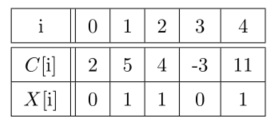



In [2]:
def sum_set(C,X):
    # takes sets C={c_1,...,c_N} and X={x_1,...,x_N} and returns x_1*c_1 + x_2*c_2 + ... + x_N*c_N
    s = 0 # this is the variable we want to store the sum in, initially it is 0.
    for i in np.arange(len(X)): # i is a number from 0 to N-1
        s += C[i] * X[i]
    return s

***
The code below builds all possible subsets and checks if any of them sum to zero. Run it and check that it gives the expected output!

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve_exactly(C):
    """
    Given a set of numbers C={c_1,...,c_N} this function 
    returns: exact_result, a list of all sets X that correspond to zero-sum subset
             duration, the time it took your computer to find all zero-sum subsets
    """
    exact_result = []
    start = time.time()
    N = len(C) # N numbers in set S={c_1,...,c_N}
    for i in np.arange(2**N):
        X = np.array([int(x_i) for x_i in (list(format(i, 'b').zfill(N)))]) # this is the set X={x_1,...,x_N}.
        # In every iteration of the for-loop X will be a different combination of 1 and 0 corresponding to a 
        # different subset
        S = sum_set(C,X) # compute sum of subset
        if S == 0:
            # if the sum of the subset is zero, add it to the results
            exact_result.append(X)
    end = time.time()
    duration = end - start
    return exact_result, duration

def print_result(C, results):
    """
    prints all subsets
    """
    for sample in results:
        answer = ''
        s = 0
        for i in np.arange(len(sample)):
            if sample[i] == 1:
                if C[i] > 0:
                    answer += " + "
                else:
                    answer += " - "
                answer += str(abs(C[i]))
                s += C[i]

        if len(answer) > 0: # don't print anything if it's the trivial set
            print(answer[3:],'=', s)

exact_result, duration = solve_exactly(np.array(C))
print_result(C, exact_result)

2 + 5 + 4 - 11 = 0


## How fast is your computer?

A very important property of our code is how long it takes to run for a specific size of the set of numbers, $N$.

We can figure this out by asking the following question:
***
### Exercise

*How many different subsets are there?*
***

Well, each number can either be included or not included in a subset. If I just have one number, there is only two options. If I have two numbers, there are $2\cdot 2=2^2=4$ options: include none, include only the first number, include only the second number, include both. 
For three numbers, we have $2\cdot 2\cdot 2 =2^3= 8$ subsets. And in general, for $N$ numbers, we have $2^N$ subsets.

If it takes some time $a$ to build a subset, and we are building $2^N$ subsets, the total time is $a \cdot 2^N$.

But now we also need to also need to sum all subsets. This takes the time $b\cdot N\cdot 2^N$. 

The total computation time, will be $a \cdot 2^N+ b \cdot N \cdot 2^N$. Since the second term gets larger much faster than the first one, the first term is not that important and it is a good approximation to neglect it.

So the total time needed is approximately $b \cdot N\cdot 2^N$. We call this *exponential scaling* of order $\mathcal{O}\left(N \cdot 2^N\right)$. The notation with the $\mathcal{O}$ ("order") simply means that we don't really care about the prefactor $b$, but only about the $N$-dependence.

Below is a code script that builds all possible subsets of sets of different size $N$ and measures the time needed for that.

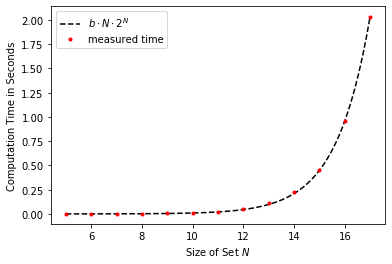

In [4]:
from scipy.optimize import curve_fit
import random

def fit_function(N,a):
    return a*N*2**N

set_sizes = np.arange(5,18) # perform simulations for sets of size 5 to 19
sets = []
durations = []
for size in set_sizes:
    C_random = ((np.random.rand(size)-0.5)*10).astype(int) # get a random set of integer numbers 
    sets.append(C_random)
    exact_result, duration = solve_exactly(C_random)
    durations.append(duration)

popt, pcov = curve_fit(fit_function, set_sizes[7:],durations[7:])
x = np.linspace(min(set_sizes),max(set_sizes),1000)
y = fit_function(x, *popt)
plt.plot(x, y, 'k--', label='$b \cdot N \cdot 2^N$');
plt.plot(set_sizes, durations,'r.', label='measured time');
plt.xlabel('Size of Set $N$');
plt.ylabel('Computation Time in Seconds');
plt.legend();

The red data points show the time your computer needed to build all subsets of a set of $N$ randomly generated numbers. The black dashed curve is the function $b \cdot N \cdot 2^N$ where $b$ has been chosen to fit the red dots. 

A different way of plotting is to use a log scale. For this, the y-axis is streched in a way that makes an exponential function look linear. This way of visualizing the data makes it easier to anticipate how long the computation time will take for large $N$.



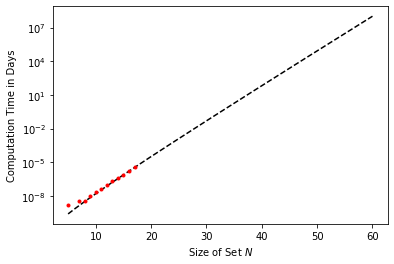

In [5]:
x = np.linspace(min(set_sizes),60,1000)
y = fit_function(x, *popt)
seconds_per_week = 604800
plt.semilogy(x, y/seconds_per_week, 'k--');
plt.semilogy(set_sizes, np.array(durations)/seconds_per_week,'r.');
plt.xlabel('Size of Set $N$');
plt.ylabel('Computation Time in Days');

***
### Exercise


*How long would it supposedly take our code to check all subsets of a set of $N=50$ numbers?*
***

# Can a Quantum Computer Help?

We have seen that it becomes nearly impossible to solve the zero sum subset problem when $N$ gets too large. 

So we need a different approach: We will use a quantum computer. There are three different types of quantum computation. Here, we will focus on an approach called *adiabatic quantum computation*. The leading company who develops this type of quantum computer id D-Wave. It is located in Burnaby and we will use their cloud service to run programs on the quantum computer in real time.

Remember the soap bubble experiment, where a physical system minimzed the total length of a Steiner tree and thereby solved a computationally hard math problem. 

The D-Wave quantum computer also minimizes an object. Instead of a Steiner tree this object is a mathematatical function $E(x_1,x_2,\dots,x_N)$ that depends on a bunch of binary variables $x_i$. This is more abstract, but it also turns out to be more useful in that it allows to solve a variety of different problems. The specific way of the minimization relies on quantum effects and we won't have time to explain it in this lecture.

For now, all we need to know is:
*The D-Wave quantum computer minimizes the function $ E(x_1,x_2,\dots,x_N) $ which is given by*

$E(x_1,x_2,\dots,x_N) = \sum_{i=1}^{N}\sum_{j=1}^{N} a_{i,j} \cdot x_i \cdot x_j$

Here, the $x_i$ are binary variables that can only have the value $0$ or $1$ and the $a_{i,j}$ are coefficients that are real numbers and can be adjusted to suit the math problem we want to solve.

Notice that we have used the sum-notation again. This time, there are two $\sum$-symbols. The strategy is the same as previously: Replace $i$ and $j$ by all combinations of numbers between $1$ and $N$ and sum up all terms. It looks like this: $E=a_{1,1} \cdot x_1 \cdot x_1+ a_{2,1} \cdot x_2 \cdot x_1 + a_{1,2} \cdot x_1 \cdot x_2 + \dots$

To be a bit more clear, we can also list all terms of the sum up to $i=4$ and $j=4$ in a table:

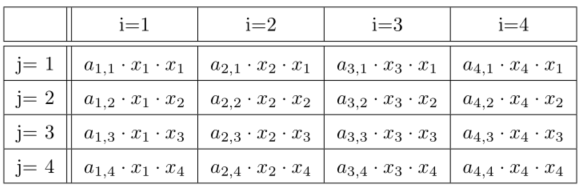

***
### Exercise
1. *Write out a few terms of the sum explicitly, by replacing $i$ and $j$ by numbers.*


2. *How many terms in the sum are there in terms of $N$?*
***




# How is this helpful for our problem?

Remeber that we want to find a subset whose sum is $S =  \sum_{i=1}^{N} x_i \cdot c_i = 0$.

Now consider the square of the sum $S^2$. The square of a number is always positive. And the smallest positive number is $0$. But if $S^2=0$ it follows that $S=0$ which is precisely the condition that we have a zero-sum subset. Therefore, minimizing $S^2$ will give us the answer.

Let us do the math:

$S^2 = \left(\sum_{i=1}^{N} x_i \cdot c_i \right)^2 = \left(\sum_{i=1}^{N} x_i \cdot c_i \right)\left(\sum_{j=1}^{N} x_j \cdot c_j \right) = \sum_{i=1}^{N}\sum_{j=1}^{N} c_i \cdot c_j \cdot x_i \cdot x_j$


***

### Exercise

1. *Can you get an idea that above calculation is correct by writing out some terms of the double-sum? If all the different terms confuse you, you could also arrange them in a table.*


2. *Calculate $S^2$ for the set $C=\{3,1,-4\}$. (This means that $c_1=3, c_2=1, c_3=-4$ and $N=3$)*
***

We see that $S^2$ exactly looks like $E(x_1,x_2,\dots,x_N)$ if we identify

$a_{i,j} = c_i \cdot c_j$ .

And as we discussed before, the D-Wave quantum computer's purpose is to minimize $E$. 

The upshot is that we only need to hand the coefficients $a_{i,j}$ to the D-Wave quantum computer. The results of the computation will then be the set $X=\{x_1,x_2,\dots,x_N\}$ that specifies the zero-sum subset.

***
### Exercise

*Implement the function $\text{coefficient_a}(i,j,C)$ that takes indices $i,j$ and the set of numbers $C$ as input and returns the coefficient $a_{i,j} = c_i \cdot c_j$.*

In [6]:
def coefficient_a(i,j, C):
    return C[i] * C[j]

We now implement the function $\text{coefficient_matrix_a}(C)$ that returns a table with entries $a_{i,j}$.

In [7]:
def coefficient_matrix_a(C):
    a = np.zeros((len(C),len(C)))
    for i in np.arange(len(C)):
        for j in np.arange(len(C)):
            a[i,j] = coefficient_a(i,j, C)
    return a

*If you want you can choose a new set of numbers:*

In [8]:
C = np.array([1,3,2,-3,-4,-4,3,2,6,3,-2,3,-5,4,-2,1-5,-4,2,-5,-1,4])

***
Now we will solve the problem on the quantum computer.

##### >> In order to run the following code, you first need to create an account at D-Wave Leap (https://www.dwavesys.com/take-leap) and follow the instructions to install dwave-ocean-sdk. It's free! <<

In [9]:
import numpy as np
import dwavebinarycsp
from dimod import BinaryQuadraticModel
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

def solve_on_quantum_computer(C, num_reads=1):
    QUBO = coefficient_matrix_a(C)
    bqm = BinaryQuadraticModel.from_numpy_matrix(QUBO)
    sampler = EmbeddingComposite(DWaveSampler())
    response = sampler.sample(bqm, num_reads=num_reads, return_embedding=True)
    duration_in_ms = response.info['timing']['qpu_access_time']/1000
    return response, duration_in_ms

num_reads = 10
response, duration = solve_on_quantum_computer(C, num_reads=num_reads)
print_result(C, [x_i.sample for x_i in response.data(['sample'])])
print('It took the quantum computer', response.info['timing']['qpu_access_time']/1000, \
      'milliseconds to perform the minimization', num_reads, 'times')

3 - 4 + 2 + 3 - 5 + 4 - 2 - 4 - 1 + 4 = 0
1 - 3 - 4 + 2 + 6 + 3 - 5 + 4 - 2 - 4 - 1 + 4 = 1
1 + 2 - 3 - 4 + 3 + 6 - 2 + 3 - 4 + 2 - 5 = -1
1 + 2 - 3 - 4 + 3 + 3 + 2 - 5 = -1
1 - 3 - 4 + 2 + 6 + 3 - 5 + 4 - 2 - 4 + 4 = 2
1 + 3 - 4 + 2 + 6 + 3 - 2 - 5 + 4 - 2 - 4 - 4 + 4 = 2
3 + 2 - 4 - 4 + 3 - 2 - 5 - 1 + 4 = -4
3 + 2 - 3 - 4 - 4 + 3 - 2 + 3 + 2 - 5 = -5
2 - 4 + 3 + 2 + 6 + 3 - 2 + 4 - 4 - 5 - 1 + 4 = 8
1 - 3 - 4 + 6 - 2 + 3 - 4 - 4 + 2 - 5 - 1 = -11
It took the quantum computer 12.545 milliseconds to perform the minimization 10 times


You will see that the D-Wave quantum computer gives you a bunch of different subsets as an answer and many, in some cases even all of them, don't sum to zero. However, you will notice that the absolute values of all of the sums are quite small.

In an ideal world, the D-Wave quantum computer would always return the correct answer. Real-world imperfections, however, lead to wrong results. But this isn't so bad. Given an answer to our problem, it is very easy to check if that answer is correct: We just have to sum up the terms. And summing up numbers has complexity $O(N)$, as we learned, so it's very easy!

So, the D-Wave computer has a tendency to get answers right, but can be wrong many times. We repeat the computation a bunch of times and check the results. As long as at least one of the answers is correct, we are good!

***
### Exercise

1. *In practice, one may have to run a problem on the D-Wave machine many times. In the code above, it is run $10$ times. Adjust the parameter $\text{num_reads}$ to somewhat larger numbers. Can you get a zero-sum subset?*


2. *Change the set $C$ and see what happends. What happends if you make the set very large?*
***

# Is it Faster?

Congratulations for having it made so far! You are now one of the few people in the world who can say to have programmed a quantum computer.

But here is the most important question: Is all of this useful? 

Previously, we saw that the brute-force solution on your computer became infeasible for large set sizes $N$ because of *exponential scaling*. How does the computation time for the D-Wave quantum computer change with $N$? Run the following code to find out.

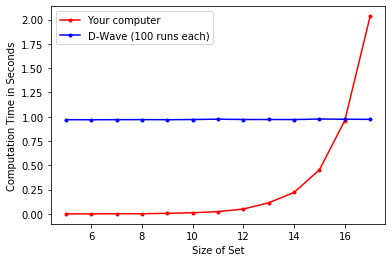

In [10]:
duration_quantum_computer = []
for i in np.arange(len(sets)):
    quantum_result, quantum_duration = solve_on_quantum_computer(sets[i], num_reads=1)
    duration_quantum_computer.append(quantum_duration)

plt.plot(set_sizes, durations,'r.-', label="Your computer");
plt.plot(set_sizes, np.array(duration_quantum_computer)/1000*100,'b.-', label="D-Wave (100 runs each)");
plt.xlabel('Size of Set');
plt.ylabel('Computation Time in Seconds');
plt.legend();

The answer is: the computation time does not depend on $N$! 

We conclude with the main take-away from this lecture: *Quantum Computers may allow us to tackle problems that would be impossible to solve otherwise.*